# DSO106 L1 Part 2 Hands on

## Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

## Read in Data

In [7]:
#to import my data
heights = pd.read_csv('../Data/Heights.csv')

In [8]:
heights.head()

,Height in Inches
0,65
1,71
2,74
3,66
4,68


## Test Assumptions

### Linearity

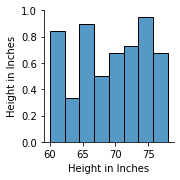

In [9]:
sns.pairplot(heights)

*Looks pretty darn linear*

### Homoscedasticity

In [5]:
x = heights['AM_Height']
y = heights['PM_Height']

In [6]:
model = sm.OLS(y,x).fit()

In [7]:
pred_val = model.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

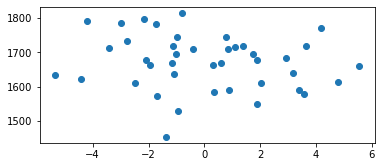

In [8]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

*uh oh, the residuals do not look random and they do not draw a straight line across! May be in danger of violating homoscedasticity*

In [9]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(17.281807808595936, nan, 29.145236144699428, 3.300037241076999e-06)

*Have definitely violated the assumption of homoscedasticity, since this p-value is significant*

In [10]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

*Going by this one, it looks like the assumption hasn't been violated, but should still try to fix it because both the graph and BP are showing issues*

In [11]:
transformed, _ = boxcox(heights['AM_Height'])

(array([1., 1., 4., 6., 4., 9., 7., 3., 3., 3.]),
 array([5.21052681e+11, 5.92351778e+11, 6.63650875e+11, 7.34949971e+11,
        8.06249068e+11, 8.77548165e+11, 9.48847262e+11, 1.02014636e+12,
        1.09144546e+12, 1.16274455e+12, 1.23404365e+12]),
 <BarContainer object of 10 artists>)

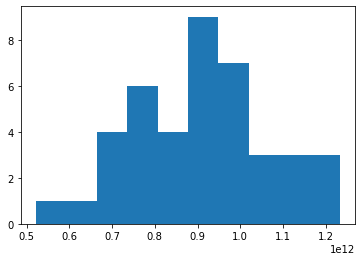

In [12]:
plt.hist(transformed)

In [13]:
x = transformed
model1 = sm.OLS(y,x).fit()

In [14]:
pred_val = model1.fittedvalues.copy()
true_val = heights['PM_Height'].values.copy()
residual = true_val - pred_val

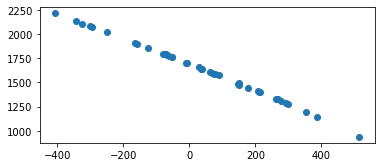

In [15]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [16]:
sms.diagnostic.het_breuschpagan(residual, heights[['AM_Height']])

(16.08941979885966, nan, 25.83547981451372, 9.088971505485366e-06)

In [17]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.004476102027705233, pvalue=0.9964526463756713)

*Things are still not looking great, but proceed for learning purposes!*

### Screening for Outliers

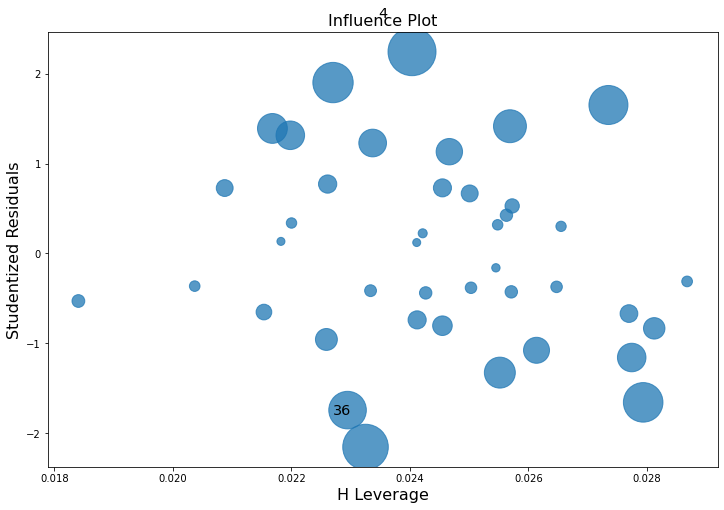

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

*In the plot above, it looks like number 36 is a problem*

In [19]:
infl = model.get_influence()
print(infl.summary_frame())

    dfb_AM_Height   cooks_d  standard_resid  hat_diag  dffits_internal  \
0        0.085810  0.007499        0.532882  0.025727         0.086594   
1       -0.052524  0.002820       -0.368264  0.020370        -0.053103   
2       -0.072577  0.005364       -0.534832  0.018407        -0.073238   
3        0.276961  0.073531        1.617035  0.027352         0.271167   
4        0.352303  0.112733        2.139438  0.024037         0.335757   
5       -0.096874  0.009521       -0.657675  0.021538        -0.097576   
6        0.018976  0.000369        0.122229  0.024116         0.019215   
7       -0.214747  0.045255       -1.314577  0.025519        -0.212733   
8       -0.064154  0.004203       -0.419385  0.023338        -0.064829   
9       -0.113058  0.012961       -0.674508  0.027698        -0.113845   
10      -0.053609  0.002940       -0.315564  0.028680        -0.054224   
11      -0.281081  0.075697       -1.622878  0.027938        -0.275131   
12      -0.176694  0.031094       -1.0

### Try a new model without row 36

In [20]:
heights.drop(heights.index[36], inplace=True)

In [21]:
x = heights['AM_Height']
y = heights['PM_Height']

In [22]:
modelNoO = sm.OLS(y,x).fit()

## Compare and Interpret the Original Model Compared to the One without Ouliers

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.665e+07
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                   5.17e-114
Time:                        12:19:26   Log-Likelihood:                         -97.263
No. Observations:                  41   AIC:                                      196.5
Df Residuals:                      40   BIC:                                      198.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9943      0.000   4079.964      0.000       0.994       0.995
==============================================================================
Omnibus:                        0.817   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.817
Skew:                           0.133   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
modelNoO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              PM_Height   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.774e+07
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                   5.93e-112
Time:                        12:19:27   Log-Likelihood:                         -93.134
No. Observations:                  40   AIC:                                      188.3
Df Residuals:                      39   BIC:                                      190.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AM_Height      0.9944      0.000   4212.277      0.000       0.994       0.995
==============================================================================
Omnibus:                        1.607   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.295
Skew:                           0.247   Prob(JB):                        0.523
Kurtosis:                       2.270   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Looks like they are both significant with very little differences, so you're good to use the original model*